In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

In [50]:
df=pd.read_csv("/kaggle/input/pokemon-data/Pokemon Data.csv")

In [51]:
df.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In [52]:
df.shape

(721, 23)

In [53]:
mode=df["Type_2"].mode()[0]
df["Type_2"]=df["Type_2"].fillna(mode)

mean=df["Pr_Male"].mean()
df["Pr_Male"]=df["Pr_Male"].fillna(mean)


mode=df["Egg_Group_2"].mode()[0]
df["Egg_Group_2"]=df["Egg_Group_2"].fillna(mode)

In [54]:
df.isnull().sum()

Number              0
Name                0
Type_1              0
Type_2              0
Total               0
HP                  0
Attack              0
Defense             0
Sp_Atk              0
Sp_Def              0
Speed               0
Generation          0
isLegendary         0
Color               0
hasGender           0
Pr_Male             0
Egg_Group_1         0
Egg_Group_2         0
hasMegaEvolution    0
Height_m            0
Weight_kg           0
Catch_Rate          0
Body_Style          0
dtype: int64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Number            721 non-null    int64  
 1   Name              721 non-null    object 
 2   Type_1            721 non-null    object 
 3   Type_2            721 non-null    object 
 4   Total             721 non-null    int64  
 5   HP                721 non-null    int64  
 6   Attack            721 non-null    int64  
 7   Defense           721 non-null    int64  
 8   Sp_Atk            721 non-null    int64  
 9   Sp_Def            721 non-null    int64  
 10  Speed             721 non-null    int64  
 11  Generation        721 non-null    int64  
 12  isLegendary       721 non-null    bool   
 13  Color             721 non-null    object 
 14  hasGender         721 non-null    bool   
 15  Pr_Male           721 non-null    float64
 16  Egg_Group_1       721 non-null    object 
 1

In [56]:
df.describe()

,Number,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Pr_Male,Height_m,Weight_kg,Catch_Rate
count,721.00000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,361.00000,417.945908,68.380028,75.013870,70.808599,68.737864,69.291262,65.714286,3.323162,0.553377,1.144979,56.773370,100.246879
std,208.27906,109.663671,25.848272,28.984475,29.296558,28.788005,27.015860,27.277920,1.669873,0.188974,1.044369,89.095667,76.573513
min,1.00000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,0.000000,0.100000,0.100000,3.000000
25%,181.00000,320.000000,50.000000,53.000000,50.000000,45.000000,50.000000,45.000000,2.000000,0.500000,0.610000,9.400000,45.000000
50%,361.00000,424.000000,65.000000,74.000000,65.000000,65.000000,65.000000,65.000000,3.000000,0.500000,0.990000,28.000000,65.000000
75%,541.00000,499.000000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,5.000000,0.553377,1.400000,61.000000,180.000000
max,721.00000,720.000000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,6.000000,1.000000,14.500000,950.000000,255.000000


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



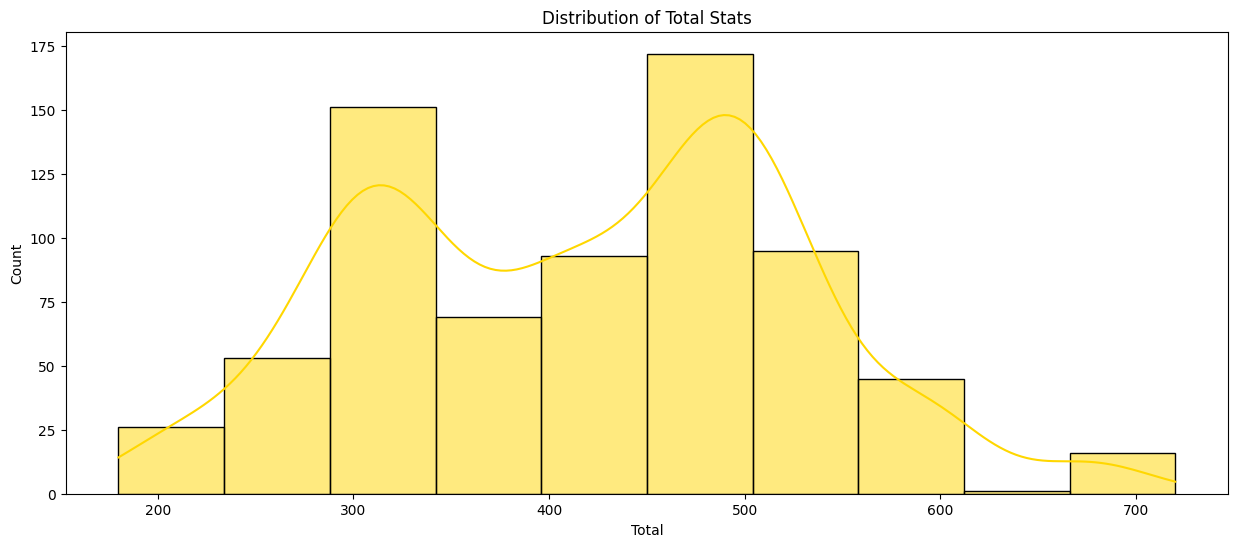

In [57]:
plt.figure(figsize=(15, 6))
sns.histplot(df['Total'], bins=10, kde=True,color="gold")
plt.title('Distribution of Total Stats')
plt.xlabel('Total')
plt.ylabel('Count')
plt.show()

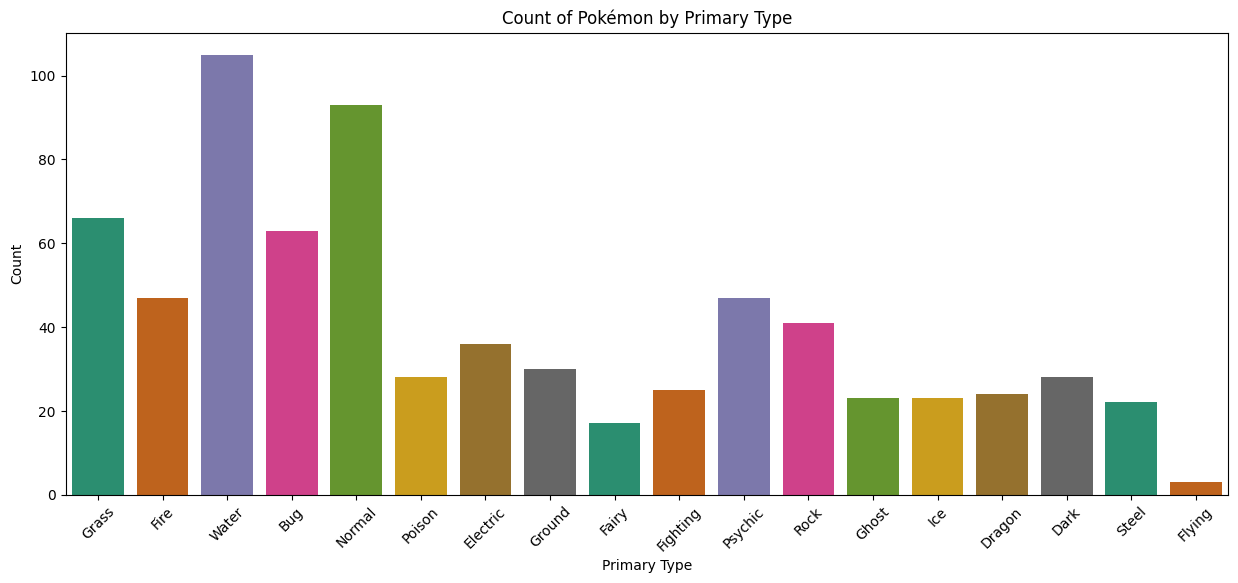

In [58]:
plt.figure(figsize=(15, 6))
sns.countplot(x='Type_1', data=df,palette="Dark2")
plt.title('Count of Pokémon by Primary Type')
plt.xlabel('Primary Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#  Univariate: Pie Chart of Color

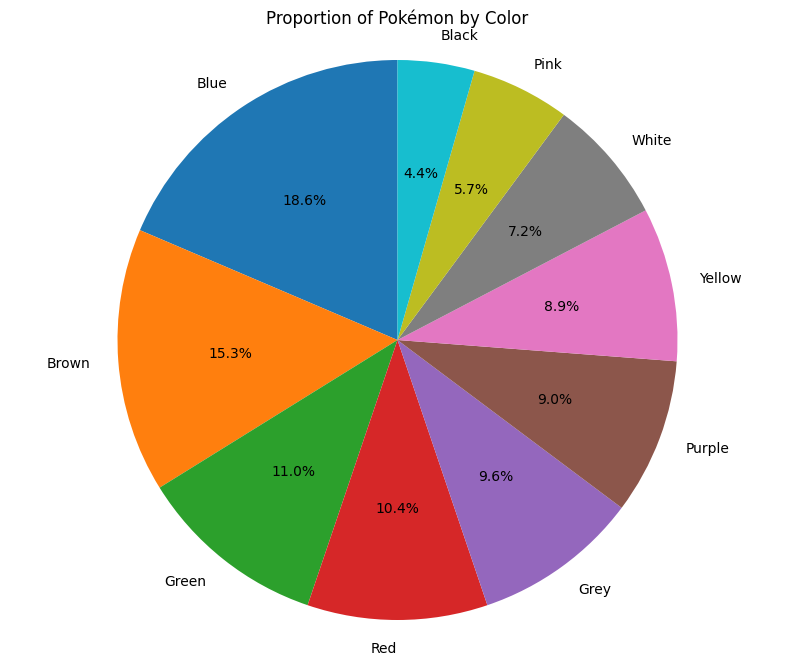

In [59]:
plt.figure(figsize=(10,8))
df['Color'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Pokémon by Color')
plt.axis("equal")
plt.ylabel('')
plt.show()

# Bivariate: Scatter Plot of Attack vs. Defense

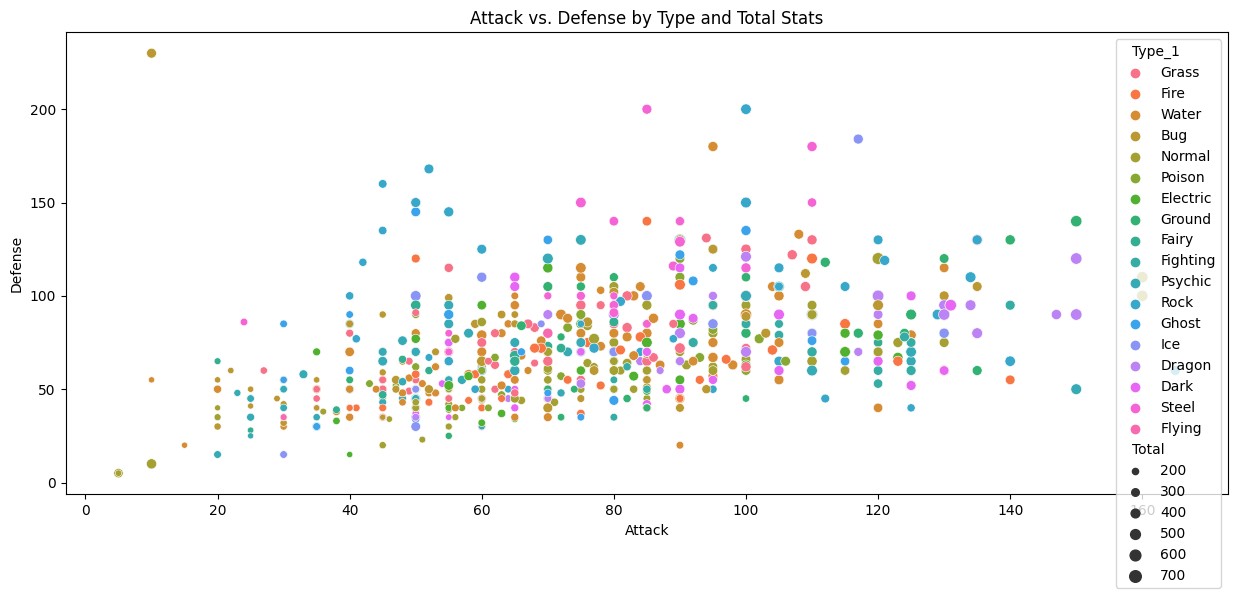

In [60]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Attack', y='Defense', hue='Type_1', size='Total', data=df)
plt.title('Attack vs. Defense by Type and Total Stats')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.show()

#  Bivariate: Box Plot of HP by Type_1

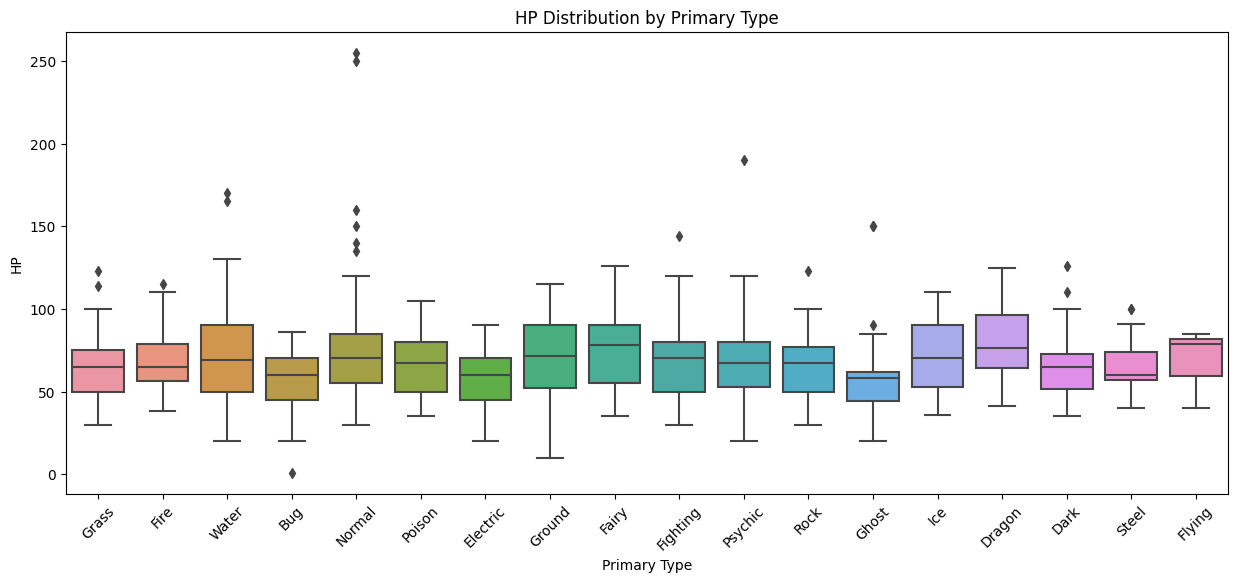

In [61]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='Type_1', y='HP', data=df)
plt.title('HP Distribution by Primary Type')
plt.xlabel('Primary Type')
plt.ylabel('HP')
plt.xticks(rotation=45)
plt.show()

#  Bivariate: Correlation Heatmap

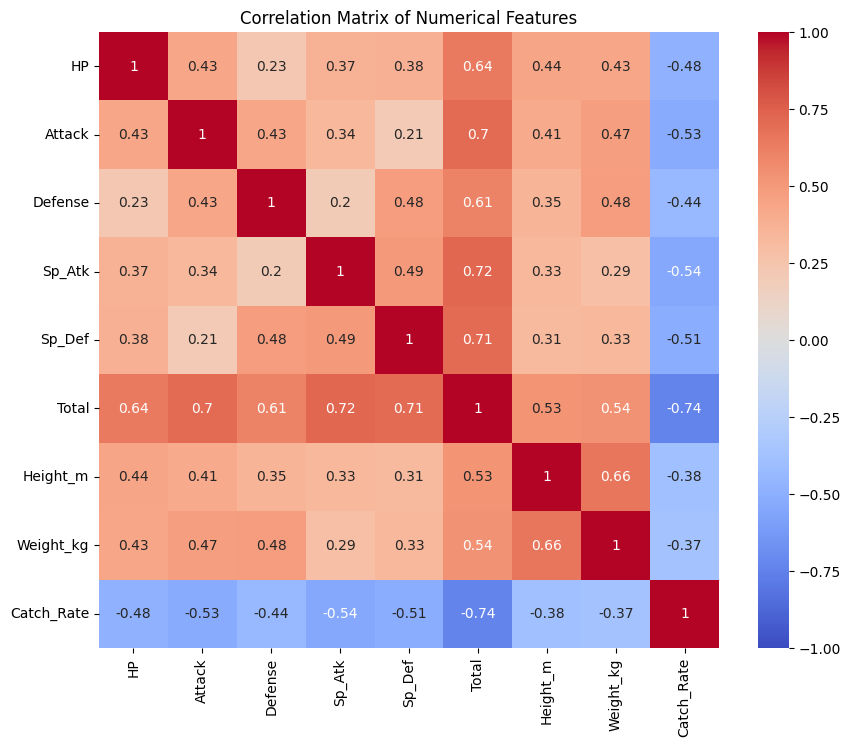

In [62]:
plt.figure(figsize=(10, 8))
corr = df[['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Total', 'Height_m', 'Weight_kg', 'Catch_Rate']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Multivariate: Pair Plot of Stats

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

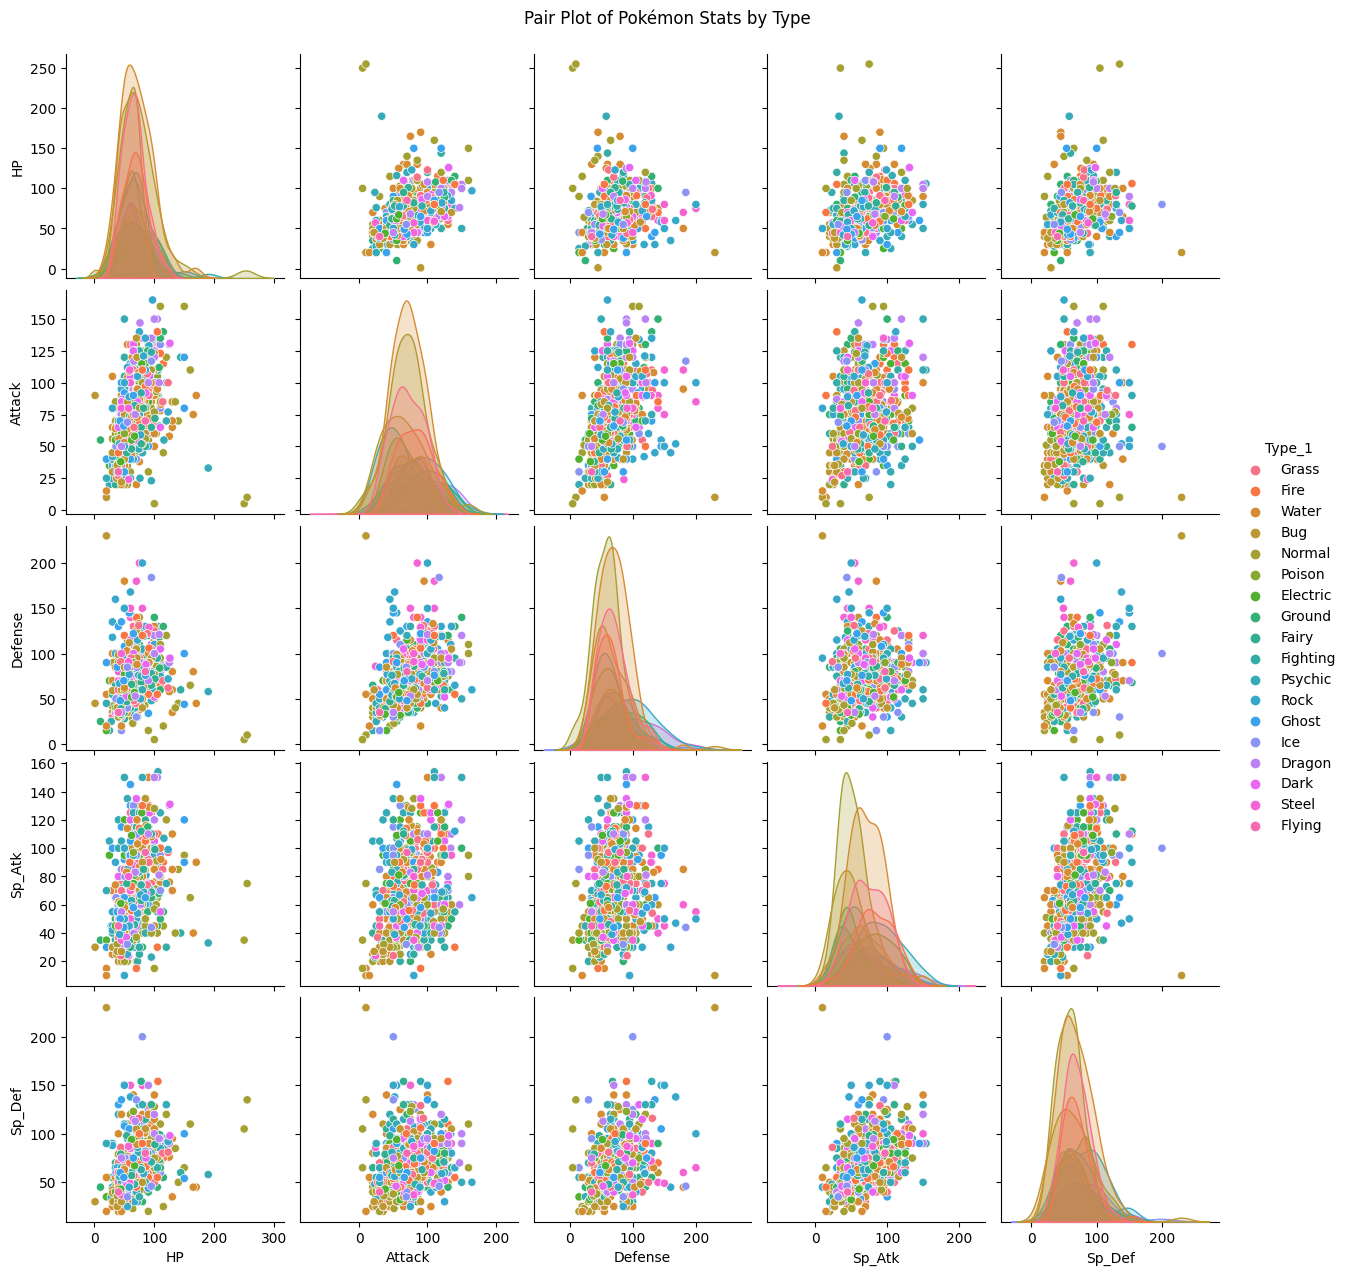

In [63]:
sns.pairplot(df[['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Type_1']], hue='Type_1')
plt.suptitle('Pair Plot of Pokémon Stats by Type', y=1.02)
plt.show()

# Multivariate: Facet Grid of HP Histograms by Type_1

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version

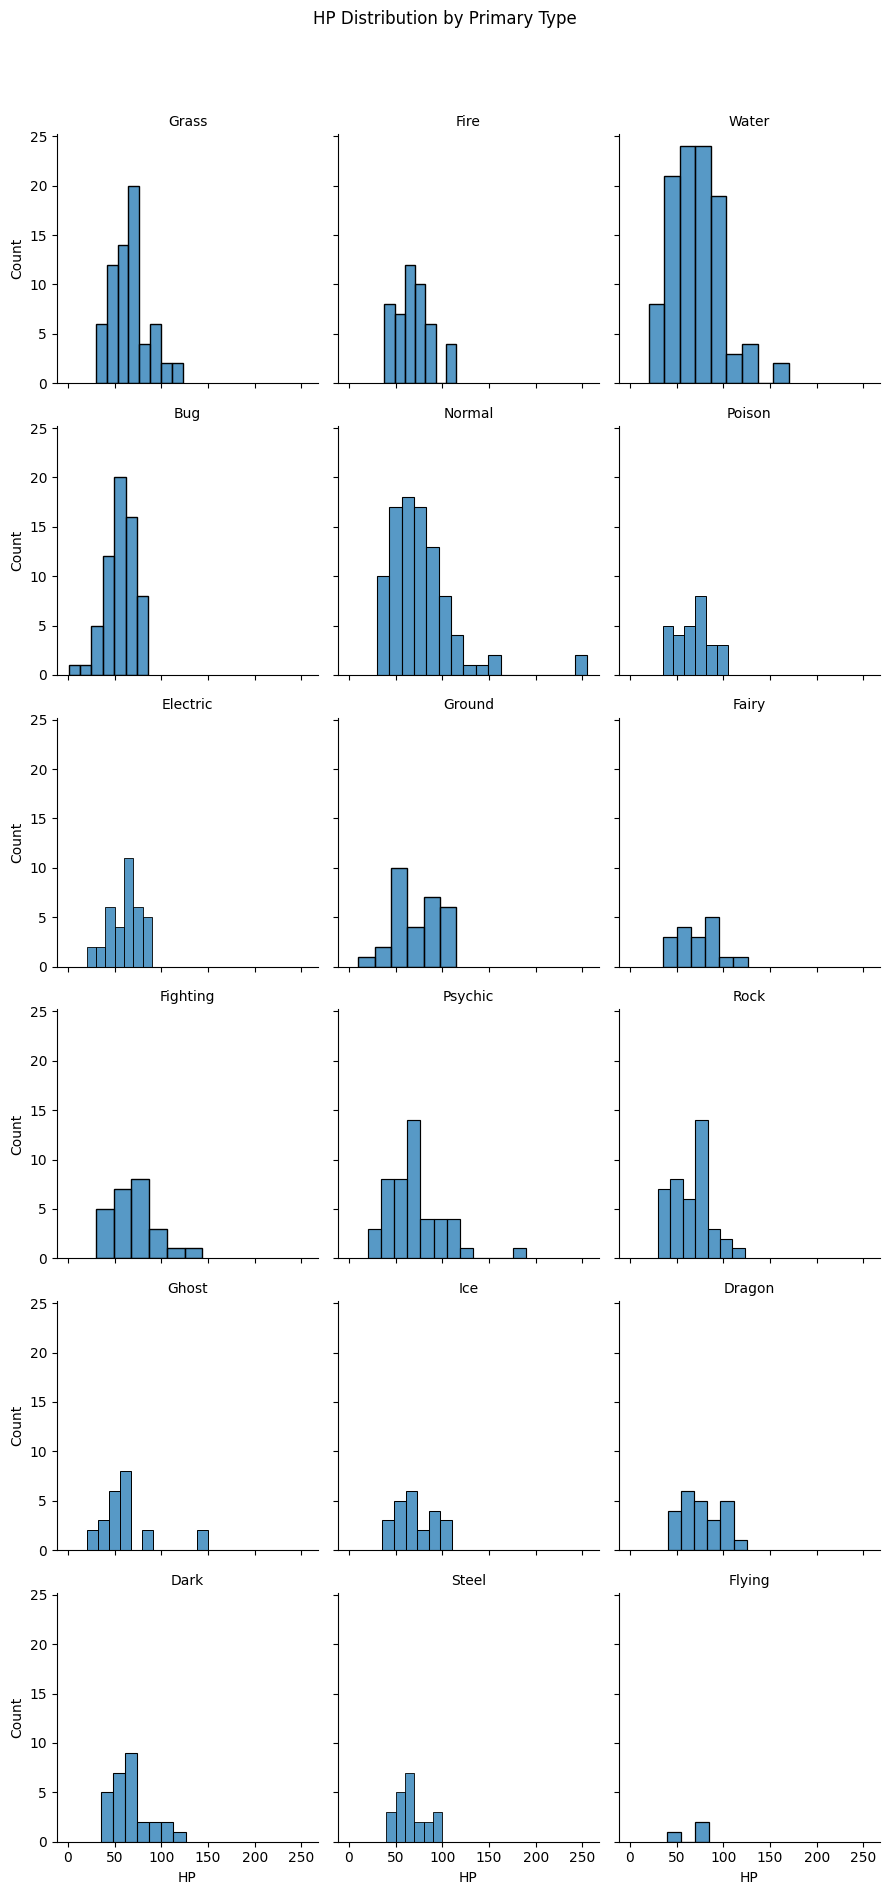

In [64]:
g = sns.FacetGrid(df, col='Type_1', col_wrap=3)
g.map(sns.histplot, 'HP')
g.set_titles('{col_name}')
g.set_axis_labels('HP', 'Count')
plt.suptitle('HP Distribution by Primary Type', y=1.05)
plt.show()

# Specialized: Radar Chart for Pokémon Stats


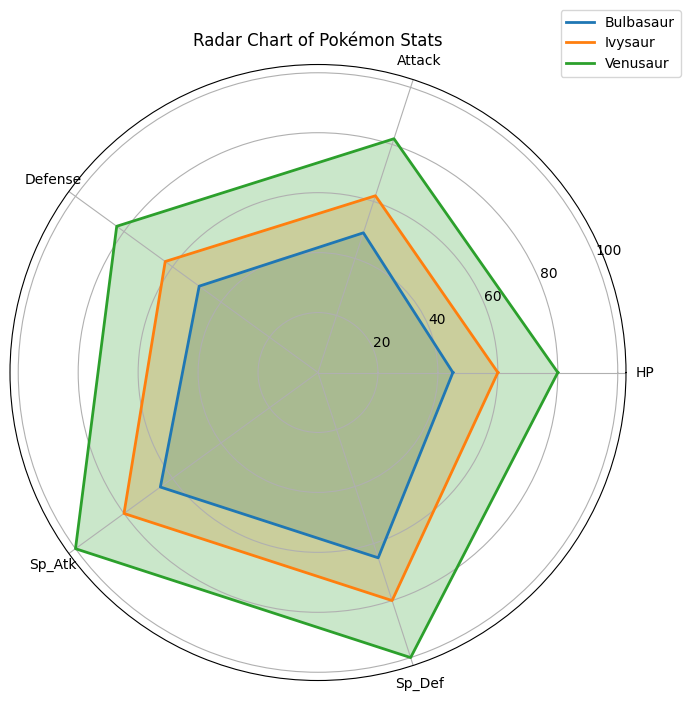

In [65]:
def radar_chart(pokemon_names, df):
    stats = ['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def']
    angles = np.linspace(0, 2 * np.pi, len(stats), endpoint=False).tolist()
    angles += angles[:1]  # Close the circle

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    for name in pokemon_names:
        values = df[df['Name'] == name][stats].values.flatten().tolist()
        values += values[:1]  # Close the circle
        ax.plot(angles, values, linewidth=2, label=name)
        ax.fill(angles, values, alpha=0.25)
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(stats)

    plt.title('Radar Chart of Pokémon Stats')
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    plt.show()


radar_chart(['Bulbasaur', 'Ivysaur', 'Venusaur'], df)

# Specialized: Type Combination Matrix

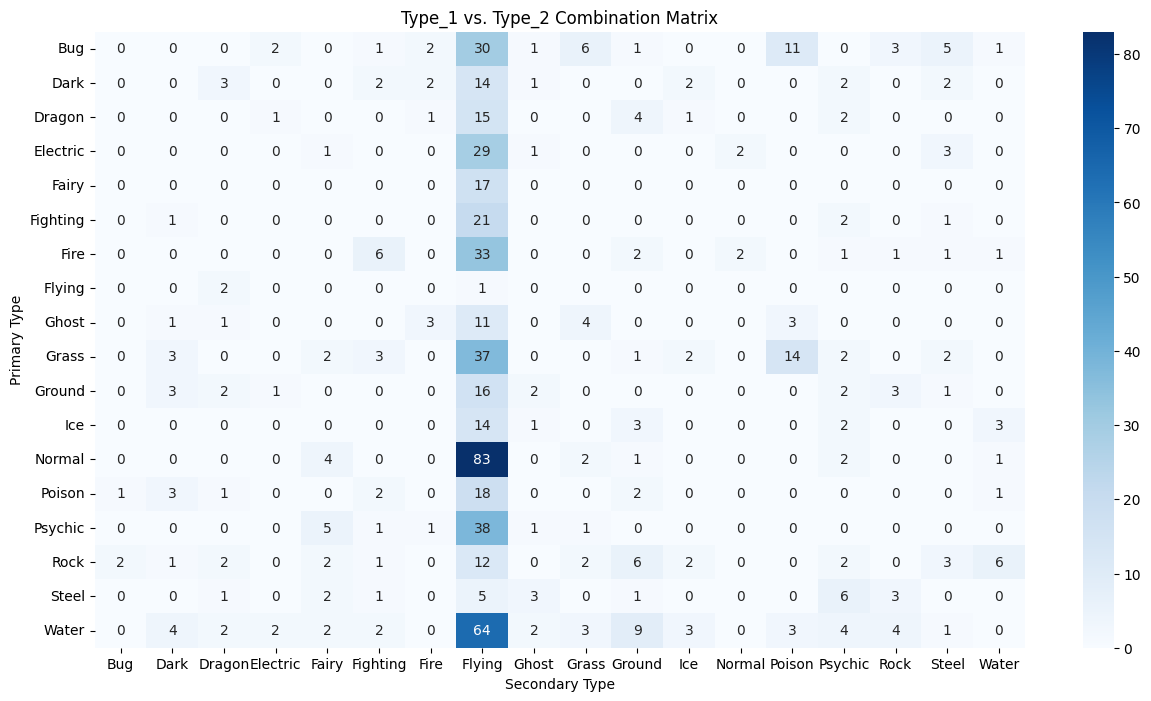

In [66]:
plt.figure(figsize=(15, 8))
type_matrix = pd.crosstab(df['Type_1'], df['Type_2'].fillna('None'))
sns.heatmap(type_matrix, annot=True, cmap='Blues')
plt.title('Type_1 vs. Type_2 Combination Matrix')
plt.xlabel('Secondary Type')
plt.ylabel('Primary Type')
plt.show()

# Interactive: Scatter Plot with Plotly

In [67]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter(df, x='Attack', y='Defense', color='Type_1', size='Total',
                 hover_data=['Name', 'HP', 'Sp_Atk', 'Sp_Def'],
                 title='Interactive Scatter Plot: Attack vs. Defense')
fig.show()

# Specialized: Evolution Chain Line Plot

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



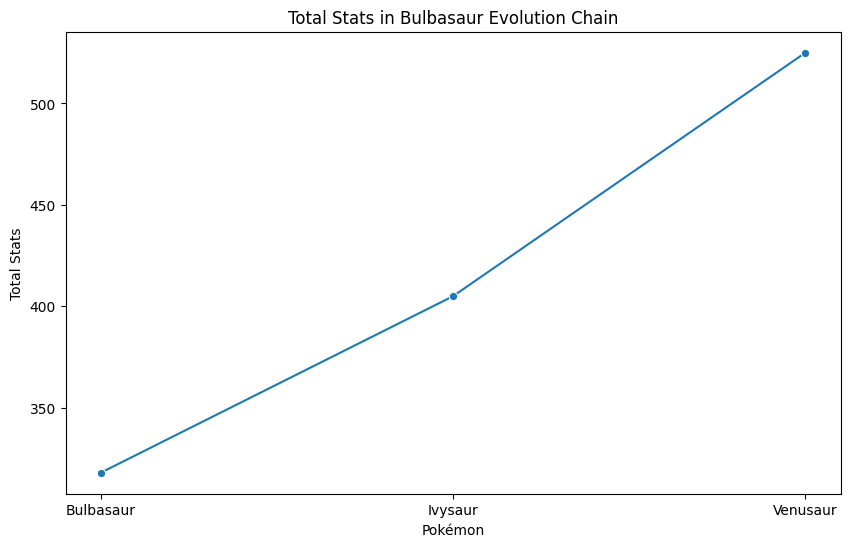

In [68]:
evolution_chain = df[df['Name'].isin(['Bulbasaur', 'Ivysaur', 'Venusaur'])]
plt.figure(figsize=(10, 6))
sns.lineplot(x='Name', y='Total', data=evolution_chain, marker='o')
plt.title('Total Stats in Bulbasaur Evolution Chain')
plt.xlabel('Pokémon')
plt.ylabel('Total Stats')
plt.show()

In [69]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load your dataset
# df = pd.read_csv("your_file.csv")

# Step 1: Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()

label_encoders = {}  # to store encoders in case you need inverse transform later

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    
    # Print mapping
    print(f"\nMapping for '{col}':")
    for class_index, class_label in enumerate(le.classes_):
        print(f"  {class_label} → {class_index}")



Mapping for 'Name':
  Abomasnow → 0
  Abra → 1
  Absol → 2
  Accelgor → 3
  Aegislash → 4
  Aerodactyl → 5
  Aggron → 6
  Aipom → 7
  Alakazam → 8
  Alomomola → 9
  Altaria → 10
  Amaura → 11
  Ambipom → 12
  Amoonguss → 13
  Ampharos → 14
  Anorith → 15
  Arbok → 16
  Arcanine → 17
  Arceus → 18
  Archen → 19
  Archeops → 20
  Ariados → 21
  Armaldo → 22
  Aromatisse → 23
  Aron → 24
  Articuno → 25
  Audino → 26
  Aurorus → 27
  Avalugg → 28
  Axew → 29
  Azelf → 30
  Azumarill → 31
  Azurill → 32
  Bagon → 33
  Baltoy → 34
  Banette → 35
  Barbaracle → 36
  Barboach → 37
  Basculin → 38
  Bastiodon → 39
  Bayleef → 40
  Beartic → 41
  Beautifly → 42
  Beedrill → 43
  Beheeyem → 44
  Beldum → 45
  Bellossom → 46
  Bellsprout → 47
  Bergmite → 48
  Bibarel → 49
  Bidoof → 50
  Binacle → 51
  Bisharp → 52
  Blastoise → 53
  Blaziken → 54
  Blissey → 55
  Blitzle → 56
  Boldore → 57
  Bonsly → 58
  Bouffalant → 59
  Braixen → 60
  Braviary → 61
  Breloom → 62
  Bronzong → 63
  Bronzor 

In [70]:
df.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,67,9,13,318,45,49,49,65,65,...,3,1,0.875,10,6,0,0.71,6.9,45,9
1,2,294,9,13,405,60,62,63,80,80,...,3,1,0.875,10,6,0,0.99,13.0,45,9
2,3,669,9,13,525,80,82,83,100,100,...,3,1,0.875,10,6,1,2.01,100.0,45,9
3,4,86,6,7,309,39,52,43,60,50,...,7,1,0.875,10,2,0,0.61,8.5,45,0
4,5,87,6,7,405,58,64,58,80,65,...,7,1,0.875,10,2,0,1.09,19.0,45,0


In [71]:
df.columns

Index(['Number', 'Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'isLegendary',
       'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 'Egg_Group_2',
       'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate',
       'Body_Style'],
      dtype='object')

In [72]:
X = df.drop('isLegendary', axis=1)
y = df['isLegendary']

# Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(10)

print("\nTop 10 Important Features for Predicting 'isLegendary':")
print(top_features)


Top 10 Important Features for Predicting 'isLegendary':
Total          0.256844
Catch_Rate     0.216464
hasGender      0.073621
Egg_Group_1    0.072251
Sp_Atk         0.057461
Weight_kg      0.052907
Height_m       0.040963
Pr_Male        0.029348
Speed          0.026595
HP             0.026212
dtype: float64


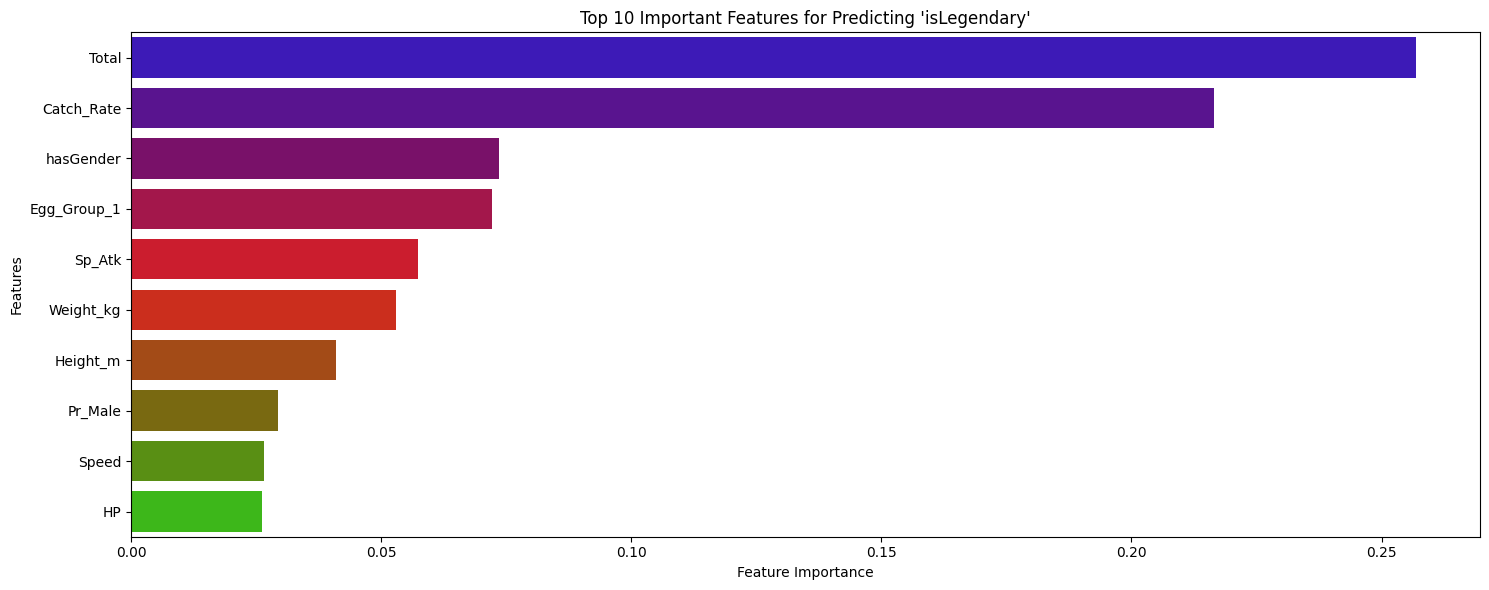

In [77]:
plt.figure(figsize=(15, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette="brg")
plt.title("Top 10 Important Features for Predicting 'isLegendary'")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [75]:
top_10_features = ['Total', 'Catch_Rate', 'hasGender', 'Egg_Group_1', 'Sp_Atk','Weight_kg', 'Height_m', 'Pr_Male', 'Speed', 'HP']

top_10_features.append('isLegendary')
df=df[top_10_features]

df.head()

,Total,Catch_Rate,hasGender,Egg_Group_1,Sp_Atk,Weight_kg,Height_m,Pr_Male,Speed,HP,isLegendary
0,318,45,1,10,65,6.9,0.71,0.875,45,45,0
1,405,45,1,10,80,13.0,0.99,0.875,60,60,0
2,525,45,1,10,100,100.0,2.01,0.875,80,80,0
3,309,45,1,10,60,8.5,0.61,0.875,65,39,0
4,405,45,1,10,80,19.0,1.09,0.875,80,58,0


In [86]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    precision_recall_curve,
    log_loss,
    balanced_accuracy_score,
    average_precision_score
)


X=df.drop(columns=["isLegendary"],axis=1)
y=df["isLegendary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
model = XGBClassifier( objective='binary:logistic',
    learning_rate=0.1,     
    max_depth=6,            
    n_estimators=1000,      
    subsample=0.8,          
    colsample_bytree=0.8,   
    reg_alpha=0.1,       
    reg_lambda=1,         
    gamma=0,              
    booster='gbtree',    
    tree_method='auto',    
    scale_pos_weight=1)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [84]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
label_name=["False","True"]
print("\nClassification Report:\n", classification_report(y_test, y_pred,target_names=label_name))

Accuracy: 0.9655172413793104

Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.99      0.98       136
        True       0.83      0.56      0.67         9

    accuracy                           0.97       145
   macro avg       0.90      0.77      0.82       145
weighted avg       0.96      0.97      0.96       145



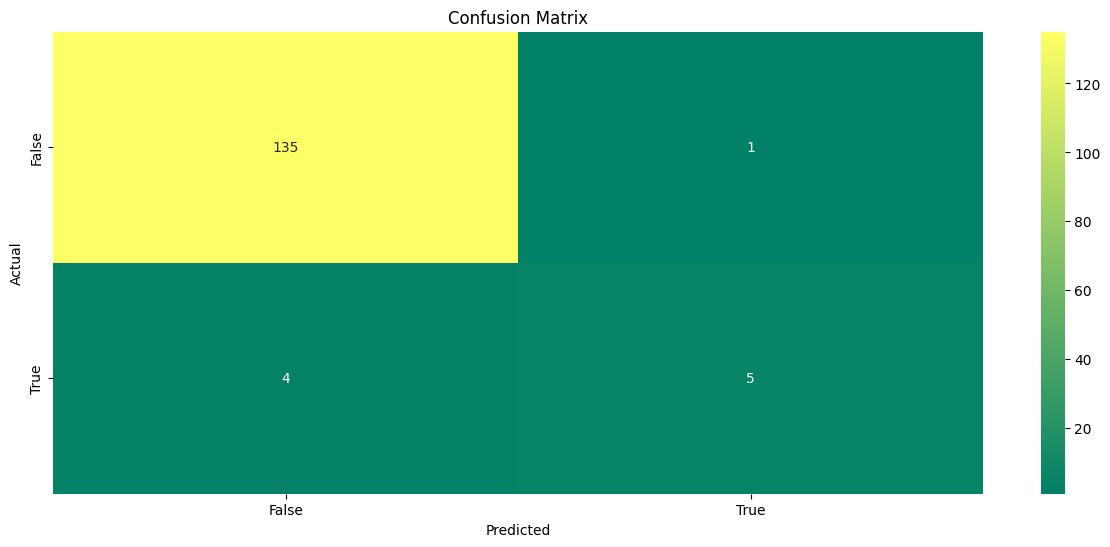

In [87]:
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(15, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='summer', xticklabels=label_name, yticklabels=label_name)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [89]:
y_proba = model.predict_proba(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba[:, 1]))

Accuracy: 0.9655172413793104
Precision: 0.8333333333333334
Recall: 0.5555555555555556
F1 Score: 0.6666666666666667
ROC AUC: 0.9926470588235294


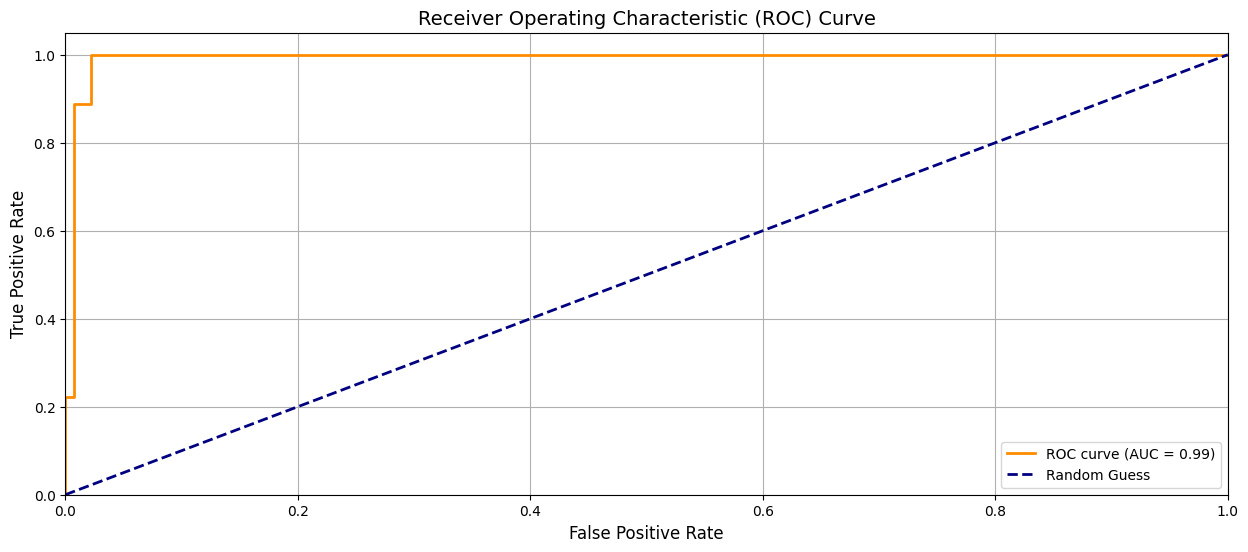

In [90]:
from sklearn.metrics import roc_curve, auc

# Get FPR (False Positive Rate), TPR (True Positive Rate), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:, 1])
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

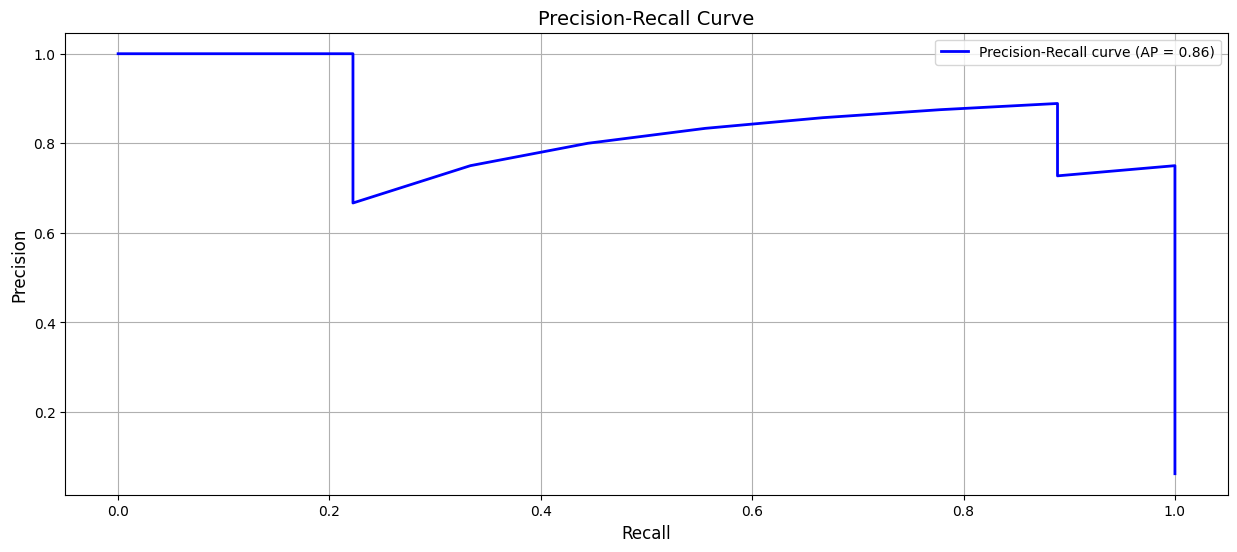

In [91]:
from sklearn.metrics import precision_recall_curve, average_precision_score


# Compute precision-recall curve and average precision
precision, recall, _ = precision_recall_curve(y_test, y_proba[:, 1])
avg_precision = average_precision_score(y_test, y_proba[:, 1])

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(recall, precision, color='blue', lw=2,
         label='Precision-Recall curve (AP = %0.2f)' % avg_precision)
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curve', fontsize=14)
plt.legend(loc="upper right")
plt.grid(True)
plt.show()

In [92]:
! pip freeze

absl-py==1.4.0
accelerate==1.8.1
aiofiles==22.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.12.13
aiosignal==1.3.2
aiosqlite==0.21.0
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.8
ale-py==0.11.1
alembic==1.16.2
altair==5.5.0
annotated-types==0.7.0
annoy==1.17.3
ansicolors==1.1.8
antlr4-python3-runtime==4.9.3
anyio==4.9.0
argon2-cffi==25.1.0
argon2-cffi-bindings==21.2.0
args==0.1.0
array_record==0.7.2
arrow==1.3.0
arviz==0.21.0
astropy==7.1.0
astropy-iers-data==0.2025.6.23.0.39.50
asttokens==3.0.0
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
autograd==1.8.0
babel==2.17.0
backcall==0.2.0
backports.tarfile==1.2.0
bayesian-optimization==3.0.0
beartype==0.21.0
beautifulsoup4==4.13.4
betterproto==2.0.0b6
bigframes==2.8.0
bigquery-magics==0.9.0
bleach==6.2.0
blinker==1.9.0
blis==1.3.0
blobfile==3.0.0
blosc2==3.5.0
bokeh==3.7.3
Boruta==0.4.3
boto3==1.39.1
botocore==1.39.1
Bottleneck==1.4.2
-e git+https://github.com/SohierDane/BigQuery_Helper@8615a7f6c1663e7f2d48aa2b32c2dbcb